# Hepatitis Dataset: Exploratory Data Analysis (EDA)
This notebook presents a systematic approach to performing Exploratory Data Analysis (EDA) on the Hepatitis dataset. The objective is to prepare the data for effective training of a Machine Learning (ML) model. The steps outlined below guide the process from initial data inspection to advanced feature engineering.
# EDA Workflow:
# 1. Import Libraries
Import essential libraries and packages necessary for data analysis and visualization.

# 2. Load the Hepatitis Dataset
Load the dataset into the environment for further exploration and preparation.

# 3. Initial Data Examination
Conduct a thorough initial examination to understand the dataset’s structure and characteristics.

# 3.1. Dataset Dimensions
df.shape: Determine the dataset’s size by reviewing the number of rows and columns.
# 3.2. Data Preview
df.head(), df.tail(), df.sample(5): Get a preliminary view of the data, examining the first, last, and random entries.
# 3.3. Dataset Information
df.info(): Gain insight into data types and the presence of missing values.
# 3.4. Statistical Summary
df.describe(): Generate summary statistics for numerical variables.
# 3.5. Feature Selection
df.select_dtypes(include/exclude="number"/"category"): Segregate numerical and categorical features for focused analysis.
# 3.6. Feature Relationships
Analyze the relationships between features using Correlation, Mutual Information, and Statistical Tests.
Data Preprocessing
# A. Duplicate Detection and Removal
Eliminate any redundant records to ensure the dataset's accuracy.
B. Handling Missing Data
Apply appropriate techniques to manage missing values, whether through imputation or removal.
# C. Skewness Correction
Address skewed distributions in numerical features to improve model performance.
D. Outlier Management
Identify and treat outliers to maintain data integrity.
# E. Data Filtering
Refine the dataset by applying filters to focus on relevant data subsets.
# F. Scaling Numerical Features
Standardize numerical variables to ensure uniformity across features.
# G. Encoding Categorical Features
Convert categorical variables into a numerical format suitable for modeling.
# H. Feature Engineering
Develop new features to enhance model accuracy and predictive power.
# Advanced Feature Techniques
# 11.1. Dimensionality Reduction
Utilize PCA, t-SNE, or UMAP to reduce the feature space while retaining essential information.
# 11.2. Manual Feature Engineering
Create custom features based on domain knowledge to capture deeper insights.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


# read hepatitis dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/datasets/hepatitis/master/data/hepatitis.csv")


# Basic Exploration
It will show all the columns of the DataFrame regardless of how many there are.

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


In [4]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [5]:
df.tail(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
145,31,female,False,False,True,False,False,True,False,False,False,False,False,1.2,75.0,173.0,4.2,54.0,True,live
146,41,female,True,False,True,False,False,True,True,True,True,False,True,4.2,65.0,120.0,3.4,NaN,True,die
147,70,female,False,False,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1.7,109.0,528.0,2.8,35.0,True,die
148,20,female,False,False,False,False,False,True,NaN,False,False,False,False,0.9,89.0,152.0,4.0,NaN,True,live
149,36,female,True,False,False,False,False,True,False,False,False,False,False,0.6,120.0,30.0,4.0,NaN,True,live
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live
154,43,female,True,False,True,False,False,True,False,True,True,True,False,1.2,100.0,19.0,3.1,42.0,True,die


In [5]:
df.shape

(155, 20)

In [7]:
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

# Sample
By default, Sample returns one random row, but you can specify the number of rows to sample and whether to sample with or without replacement.

In [6]:
df.sample(n=5)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
90,50,male,False,False,True,False,False,False,True,True,True,False,False,0.9,230.0,117.0,3.4,41.0,True,live
58,64,female,True,True,True,True,False,False,True,False,False,False,False,1.0,80.0,38.0,4.3,74.0,False,live
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live


In [7]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

# Null Handling

In [10]:
# use the function to find nulls value of each row
# drop 5 rows (These 5 rows have many null values)
df.isnull().sum()


,0
age,0
sex,0
steroid,1
antivirals,0
fatigue,1
malaise,1
anorexia,1
liver_big,10
liver_firm,11
spleen_palpable,5


# Defines dataset for null values

In [8]:
def find_isna(data_frame:pd.DataFrame,Condition:int = 0):
    list_isna=list() #This initializes an empty list called

    #Loop Through the DataFrame Rows
    for row_index in range(len(data_frame)-1):

      #For each row, it checks if the number of missing values is greater than or equal to the specified Condition
        if data_frame.iloc[row_index].isna().sum()>=Condition:

            #selects the row at the given index. counts the number of NaN values in that row.
            #If the condition is met, the count of missing values for that row is appended to the list_isna list.
            list_isna.append(data_frame.iloc[row_index].isna().sum())

    #A new DataFrame called value_data_frame is created from the list_isna list, with a single column named "isna".
    #.reset_index() resets the index of the DataFrame, creating a new default integer index.
    value_data_frame=pd.DataFrame(data=list_isna,columns=["isna"]).reset_index()

    #The function returns the value_data_frame DataFrame containing the count of missing values for rows that met the condition.
    return value_data_frame

# Extracting Category, Numeric columns

In [9]:
# Select categorical columns from DataFrame df that have data types of either object (string) or boolean.
categoory_columns = df.select_dtypes(include=[np.object_, 'bool']).columns #name of categorical columns
# Select numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns #name of numeric columns
# Drop target column
categoory_columns = categoory_columns.drop(labels=["class"]) #drop target columns
# Commented out line (not executed)
# categoory_columns.tolist().remove('class') #remove class object inplace


In [10]:
categoory_columns

Index(['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'histology'],
      dtype='object')

In [11]:
numeric_columns

Index(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], dtype='object')

# Null handling

In [12]:
# use the function to find nulls value of each row
# drop 5 rows (These 5 rows have many null values)
nulls=find_isna(df)
nulls=nulls.sort_values("isna")
# df=df.drop(index=nulls.tail(5).index) #[72,41,118,56,147]

In [17]:

pd.isna(df).sum().sum()

167

# KNN imputer method (numeric)

In [13]:
#This line creates an instance of the KNNImputer from scikit-learn with the parameter n_neighbors=3,
# which means it will use the 3 nearest neighbors to fill missing values.
knn_imputer=KNNImputer(n_neighbors=3)

#This line applies the KNN imputation to the numeric columns of the DataFrame df
#The fit_transform method fits the imputer on the data (calculates the nearest neighbors)
#and then transforms the data by filling in the missing values.
#The result is a NumPy array (df1_imputed) containing the imputed values.
df1_imputed=knn_imputer.fit_transform(df[numeric_columns]) #np_array

#This line converts the NumPy array df1_imputed back into a DataFrame
# and assigns it back to the original DataFrame df for the numeric columns.

df[numeric_columns]=pd.DataFrame(df1_imputed,columns=[numeric_columns]) #np_array to Dataframe
# pd.isna(df_numeric).sum().sum() #cheke nulls

# Fix categoory cols

In [14]:

# categoory
df[categoory_columns] = df[categoory_columns].fillna(df[categoory_columns].mode().iloc[0])
# pd.isna(df[categoory_columns]).sum().sum() #0
df[categoory_columns]

<ipython-input-14-d1029c093cc5>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categoory_columns] = df[categoory_columns].fillna(df[categoory_columns].mode().iloc[0])


,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology
0,male,False,False,False,False,False,False,False,False,False,False,False,False
1,female,False,False,True,False,False,False,False,False,False,False,False,False
2,female,True,False,True,False,False,True,False,False,False,False,False,False
3,female,True,True,False,False,False,True,False,False,False,False,False,False
4,female,True,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,female,True,False,True,True,True,True,False,False,True,True,True,True
151,female,True,False,True,False,False,True,True,False,False,False,False,True
152,female,False,False,True,True,False,False,True,False,True,False,False,True
153,male,False,False,True,False,False,True,False,True,True,False,True,True


# LabelEncoder

In [15]:
#This line creates an instance of the LabelEncoder from scikit-learn. LabelEncoder is used to convert
#categorical labels (strings or other types) into numeric labels.
le=LabelEncoder()

#le.fit(df[col]): Fits the LabelEncoder to the unique values in the column col of the DataFrame df.
#This determines the mapping from categorical labels to numeric labels.
for col in categoory_columns:
  le.fit(df[col])

#df[col] = le.transform(df[col]): Transforms the categorical labels in the column col to numeric labels
#and assigns the transformed values back to the DataFrame df.
  df[col]=le.transform(df[col])

#df["class"] = le.transform(df["class"]): Transforms the categorical labels in the "class" column to numeric labels
#and assigns the transformed values back to the DataFrame df.
le.fit(df["class"])
df["class"]=le.transform(df["class"])

# remove Dublicate

In [16]:

df.duplicated().sum() #0
df.drop_duplicates()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30.0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,94.666667,0,1
1,50.0,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.000000,42.0,3.5,57.000000,0,1
2,78.0,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.000000,32.0,4.0,58.000000,0,1
3,31.0,0,1,1,0,0,0,1,0,0,0,0,0,0.7,46.000000,52.0,4.0,80.000000,0,1
4,34.0,0,1,0,0,0,0,1,0,0,0,0,0,1.0,123.333333,200.0,4.0,70.333333,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46.0,0,1,0,1,1,1,1,0,0,1,1,1,7.6,127.000000,242.0,3.3,50.000000,1,0
151,44.0,0,1,0,1,0,0,1,1,0,0,0,0,0.9,126.000000,142.0,4.3,52.333333,1,1
152,61.0,0,0,0,1,1,0,0,1,0,1,0,0,0.8,75.000000,20.0,4.1,82.666667,1,1
153,53.0,1,0,0,1,0,0,1,0,1,1,0,1,1.5,81.000000,19.0,4.1,48.000000,1,1


# correlation

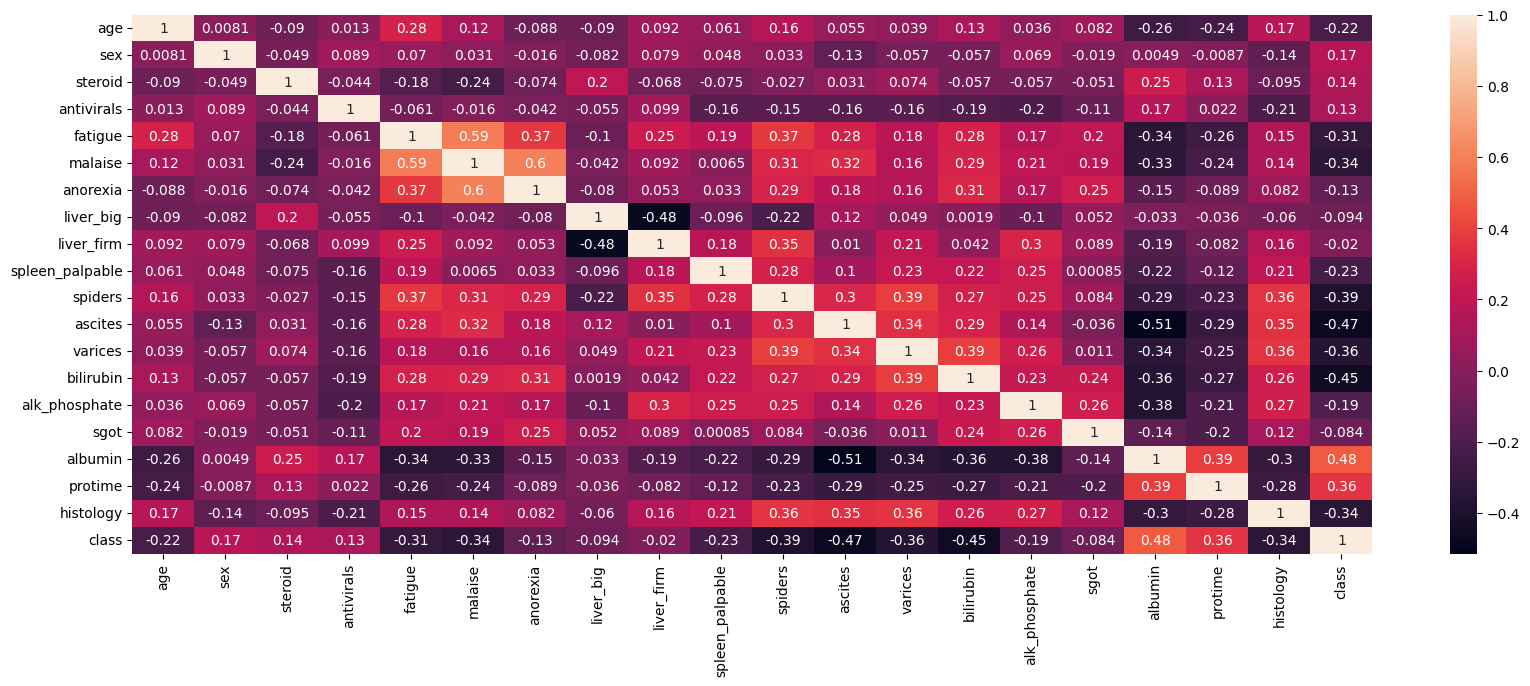

In [18]:
# df[numeric_columns].corr() #Tabular Show


# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True)

# Set the figure size for the plot
plt.rcParams['figure.figsize'] = (20, 7)

# Display the plot
plt.show()



# Skewness handing
The df.skew() function in pandas is used to calculate the skewness of each numerical column in a DataFrame.

In [19]:
df.skew()

,0
age,0.365294
sex,2.633738
steroid,-0.039096
antivirals,1.926980
fatigue,-0.642651
malaise,0.440068
anorexia,1.464700
liver_big,-1.859869
liver_firm,0.468129
spleen_palpable,1.566545


# Skewness_handler
This function, robust_skewness_handler, is designed to handle skewness in numerical columns of a pandas DataFrame, making the data more symmetrical for analysis

# Purpose:
It corrects highly skewed data (as defined by a skewness threshold) by applying transformations like logarithms, square roots, or Box-Cox transformations. It also specifically addresses "zero-inflated" data (columns with many zero values).

In [20]:
from scipy import stats

def robust_skewness_handler(df, threshold=2.0):
    transformed_df = df.copy()
    transformation_dict = {}

      #Only numerical columns (np.number) are processed.
    for col in df.select_dtypes(include=[np.number]).columns:

      #Missing values (NaN) are ignored with dropna().
        data = df[col].dropna()

        #The skewness of each column is calculated using data.skew().
        skewness = data.skew()

        #If the absolute skewness exceeds the threshold (default is 2.0),
        #the function attempts to reduce it.
        if abs(skewness) > threshold:

            print(f"Handling skewness for {col} (skewness: {skewness:.2f})")

            #If more than 10% of a column's values are zeros
            #Handle zero-inflated or near-zero-inflated data
            if (data == 0).sum() / len(data) > 0.1:  # If more than 10% zeros

                non_zero = data[data != 0]
                if len(non_zero) > 0:
                    log_transform = np.log1p(non_zero)
                    transformed_df.loc[data != 0, col] = log_transform
                    transformation_dict[col] = ('log1p', 'zero-inflated')
                    print(f"  Applied Log1p to non-zero values for {col}")
                continue

            # Handling Skewness:
            # Try Box-Cox transformation
            min_val = data.min()

            #If the data has no zeros or negative values, the Box-Cox transformation is attempted.
            # This adjusts the data to reduce skewness.
            if min_val <= 0:
                shift = abs(min_val) + 1
                shifted_data = data + shift
            else:
                shifted_data = data

            try:
                #The transformation's lambda parameter is stored for reference.
                transformed_data, lambda_param = stats.boxcox(shifted_data)
                transformed_df[col] = transformed_data
                transformation_dict[col] = ('box-cox', lambda_param)
                print(f"  Applied Box-Cox to {col} (lambda: {lambda_param:.2f})")
            except:
                # If Box-Cox fails, try other transformations
                if skewness > 0:  # Right-skewed
                    if data.max() / data.min() > 1000:  # Very large range
                        transformed_df[col] = np.log1p(data)
                        transformation_dict[col] = ('log1p', None)
                        print(f"  Applied Log1p to {col}")
                    else:
                      #Otherwise, a square root transformation is applied.
                        transformed_df[col] = np.sqrt(data)
                        transformation_dict[col] = ('sqrt', None)
                        print(f"  Applied Square Root to {col}")
                else:  # Left-skewed
                #The square of the values is used,
                # flipping the data to reduce skewness.

                    transformed_df[col] = data ** 2
                    transformation_dict[col] = ('square', None)
                    print(f"  Applied Square to {col}")

    return transformed_df, transformation_dict


In [21]:
def visualize_numerical_distributions(df, exclude_columns='id'):

    # Set up the figure for multiple subplots
    num_cols = 3  # Number of columns for the subplot grid
    num_rows = (len(numeric_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    fig.suptitle('Distribution of Numerical Features', fontsize=16)

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Iterate over each numerical column and create a histogram with KDE
    for i, col in enumerate(numeric_columns):
        sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue", element="step", stat="density")
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
    plt.show()

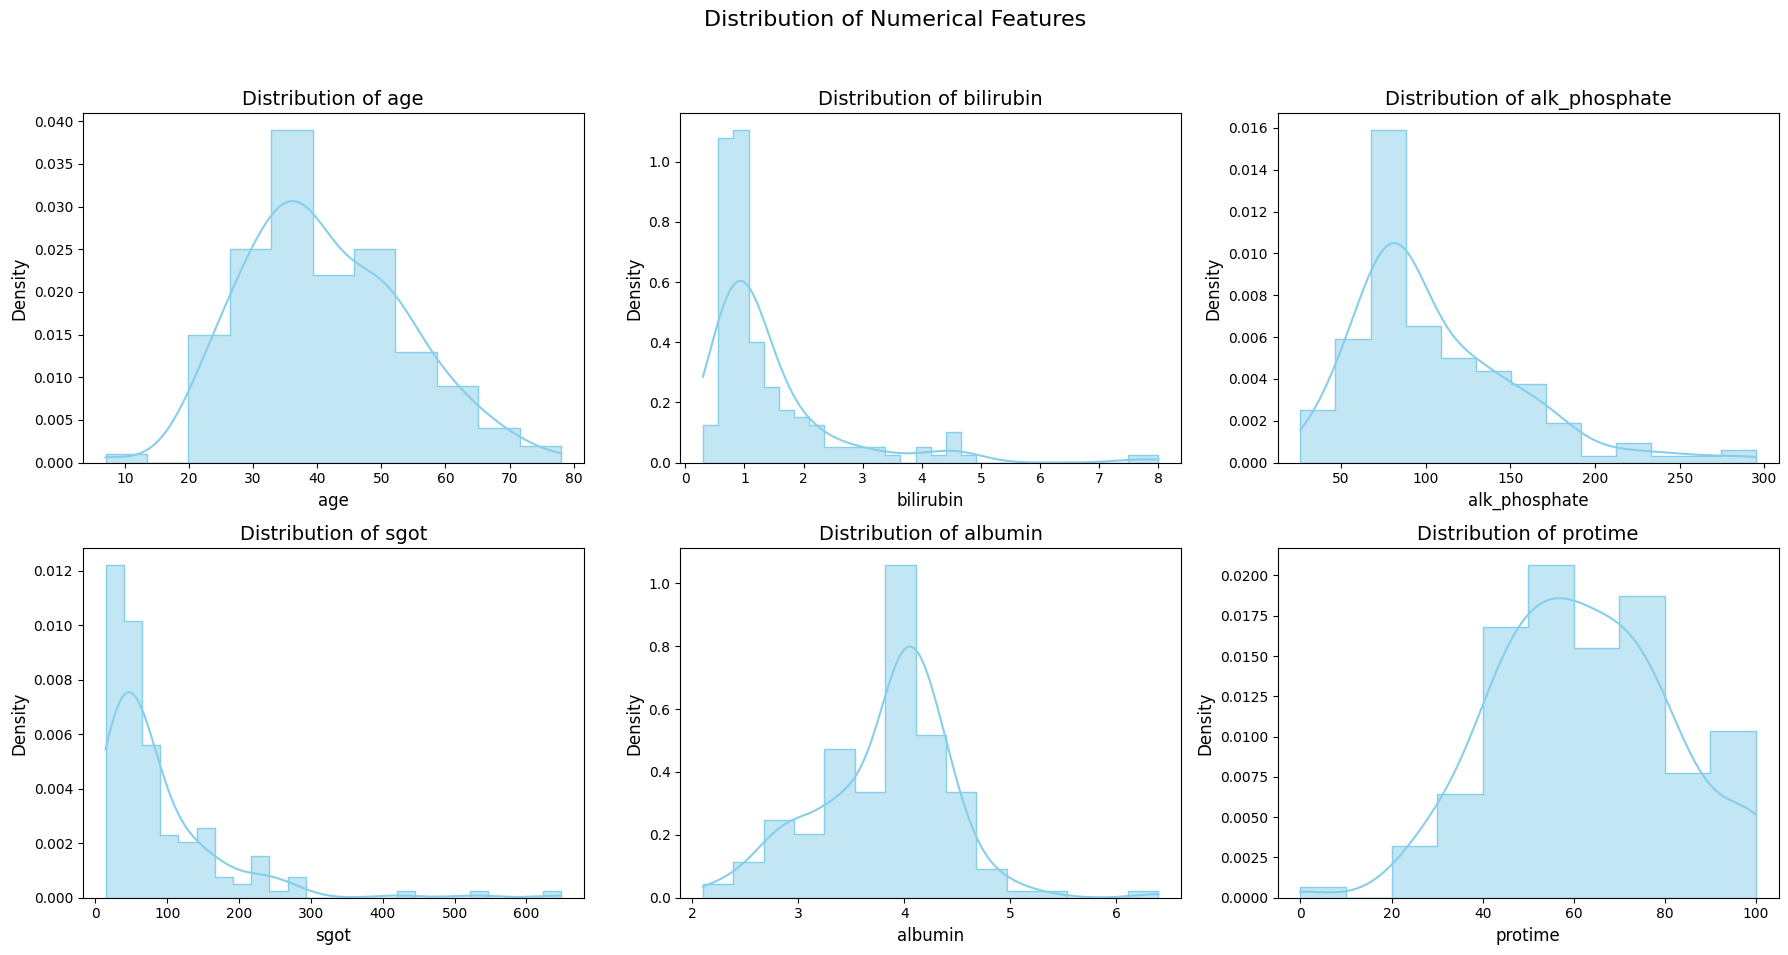

In [22]:
visualize_numerical_distributions(df)

Handling skewness for sex (skewness: 2.63)
  Applied Log1p to non-zero values for sex
Handling skewness for ascites (skewness: 2.23)
  Applied Log1p to non-zero values for ascites
Handling skewness for varices (skewness: 2.42)
  Applied Log1p to non-zero values for varices
Handling skewness for bilirubin (skewness: 2.92)
  Applied Box-Cox to bilirubin (lambda: -0.55)
Handling skewness for sgot (skewness: 3.15)
  Applied Box-Cox to sgot (lambda: -0.20)


<ipython-input-20-5e633f8a02ee>:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  transformed_df.loc[data != 0, col] = log_transform
<ipython-input-20-5e633f8a02ee>:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  transformed_df.loc[data != 0, col]

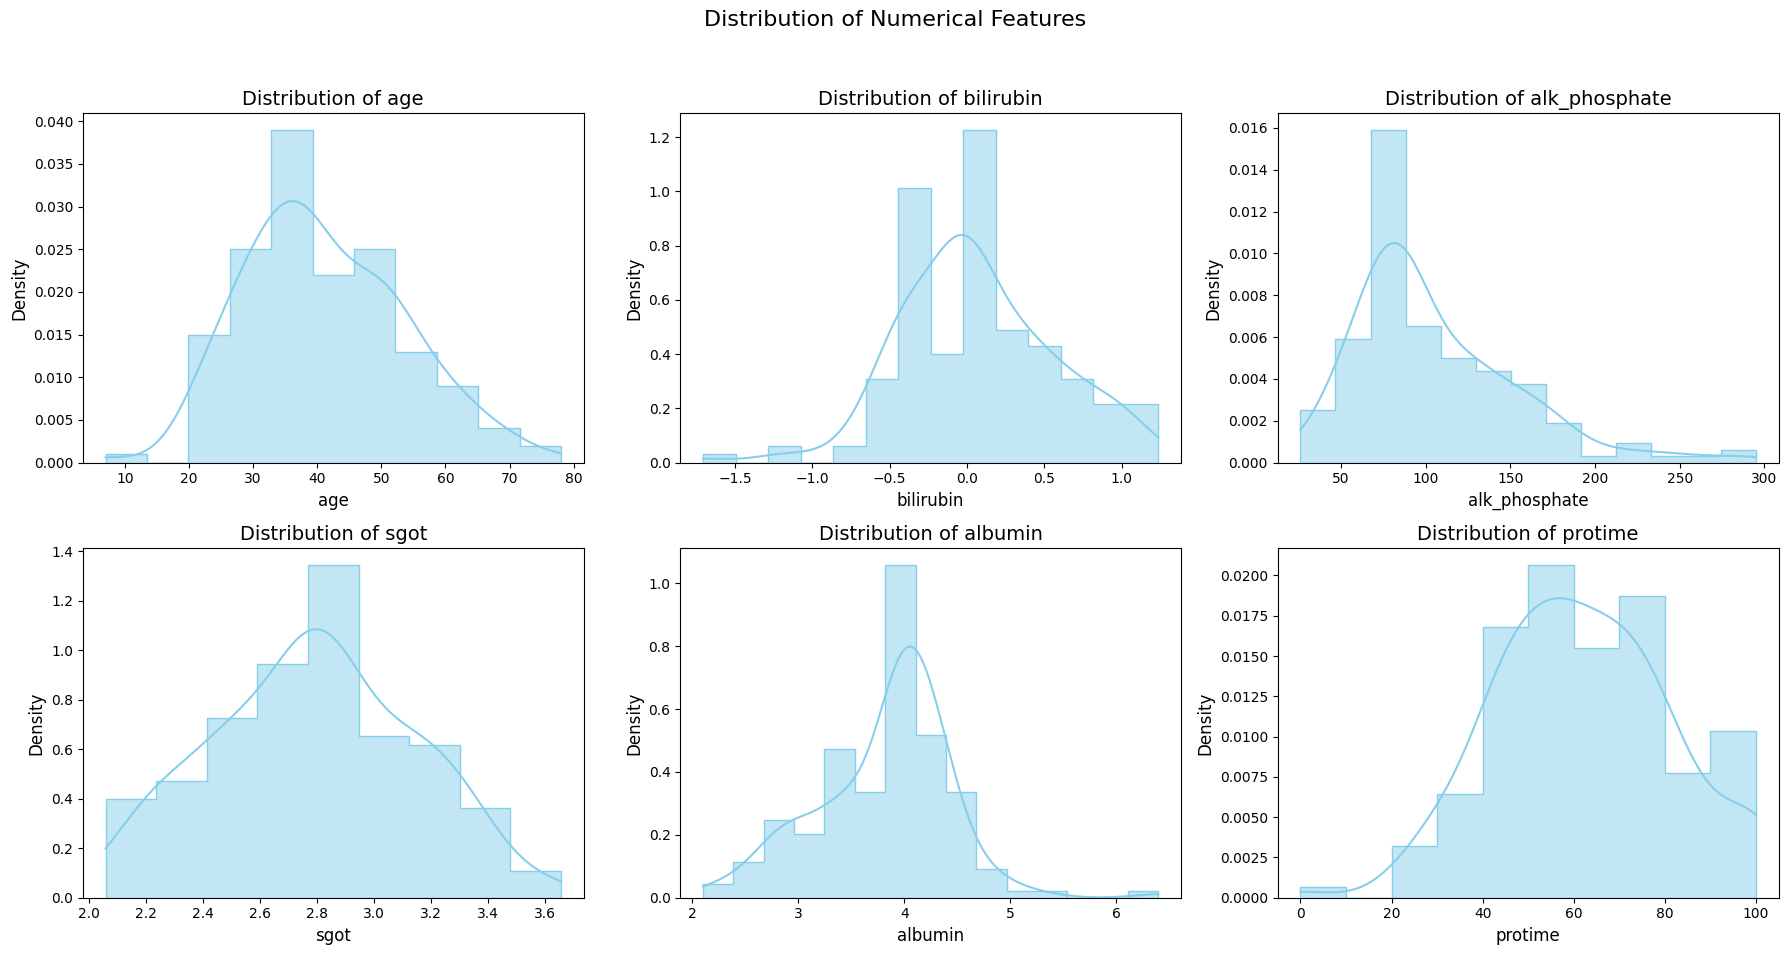

In [23]:
transformed_df, transformations = robust_skewness_handler(df)
visualize_numerical_distributions(transformed_df)

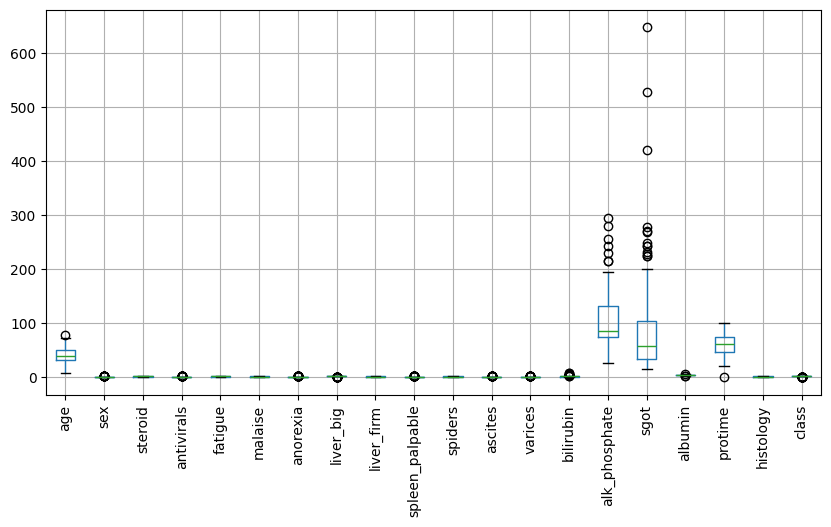

In [24]:

plt.figure(figsize=(10,5))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

# Caclculate Outliers Percentage
calculate and display the percentage of outliers in the numerical columns

In [25]:
def calculate_outliers_percentage(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        #The 25th percentile value of the column.
        Q1 = df[column].quantile(0.25)
        #The 75th percentile value of the column.
        Q3 = df[column].quantile(0.75)

        #The difference between Q3 and Q1
        IQR = Q3 - Q1

        #Any value outside these bounds is considered an outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
      #Formula percentage=(Number of Outliers/Total Number of Rows)*100
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")

# Function is designed to address outliers in numerical columns of a DataFrame by "capping" their values within a specified range.

In [26]:
def handle_outliers(df):
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # If the lower bound for a column is 10 and the upper bound is 100: A value of 5 will be replaced with 10.
        # A value of 150 will be replaced with 100.

        # Capping
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

In [27]:
calculate_outliers_percentage(df)

Percentage of outliers in age: 0.65%
Percentage of outliers in sex: 10.32%
Percentage of outliers in steroid: 0.00%
Percentage of outliers in antivirals: 15.48%
Percentage of outliers in fatigue: 0.00%
Percentage of outliers in malaise: 0.00%
Percentage of outliers in anorexia: 20.65%
Percentage of outliers in liver_big: 16.13%
Percentage of outliers in liver_firm: 0.00%
Percentage of outliers in spleen_palpable: 19.35%
Percentage of outliers in spiders: 0.00%
Percentage of outliers in ascites: 12.90%
Percentage of outliers in varices: 11.61%
Percentage of outliers in bilirubin: 10.97%
Percentage of outliers in alk_phosphate: 4.52%
Percentage of outliers in sgot: 8.39%
Percentage of outliers in albumin: 1.94%
Percentage of outliers in protime: 0.65%
Percentage of outliers in histology: 0.00%
Percentage of outliers in class: 20.65%
